# Lecture 17 – Grouping

## Spark 10, Spring 2024

In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

## Grouping with `df.groupby`

The term "group" in data science is most commonly associated with data aggregation and disaggregation. When we "group" a table in Python, we are able to gain insights about our data at a higher unit of analysis (e.g. at a city or state level, as opposed to the individual level).

Returning to the `top_10` dataset from last week (showing the songs on the Spotify Top 10)

In [2]:
top_10 = pd.read_csv('data/regional-global-daily-latest.csv').take(np.arange(10))
top_10.head()

,rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams
0,1,Kate Bush,Running Up That Hill,Rhino,1,1,41,7208654
1,2,Harry Styles,As It Was,Columbia,1,2,99,6543793
2,3,Joji,Glimpse of Us,88rising Music/Warner Records,1,3,28,5492997
3,4,"Bad Bunny, Chencho Corleone",Me Porto Bonito,Rimas Entertainment LLC,2,4,63,5416421
4,5,"Bizarrap, Quevedo","Quevedo: Bzrp Music Sessions, Vol. 52",DALE PLAY Records,5,-1,1,4676471


### Quick Check Review 1

(Multiple Choice):

If we wanted to check which artists show up the most in the `top_10` table, we can use...
- (a) :    `top_10.value_counts('track_name')`
- (b) :    `top_10['stream'].sum()`
- (c) :    `top_10.value_counts('artist_names')`
- (d) :    `top_10['artist_names'].value_counts().head(1)`

In [ ]:
# Fill in the ... with your answer(s)
my_choice1 = '...'

### Quick Check Review 2

Suppose we also had the table `Ages`, which gives the age of all the artists in our dataset.

In [ ]:
ages = [['Kate Bush',65],
        ['Harry Styles',30],
        ['Joji',31],
        ['Bad Bunny',30],
        ['Bizarrap',25]]
Ages = pd.DataFrame(ages, columns = ['artist','age'])
Ages

(Multiple Choice). If we wanted to merge `top_10` with `artist_ages`, we would use...
- (a) :    **pd.merge**(Ages, top_10, left_on = **'artist'**,right_on = **'track_name'**)
- (b) :    **pd.merge**(Ages, top_10, left_on = **'artist'**,right_on = **'artist_names'**)
- (c) :    **pd.concat**(Ages, top_10, left_on = **'age'**,right_on = **'artist_names'**)

In [ ]:
# Fill in the ... with your answer(s)
my_choice2 = '...'

### `df.value_counts`

Recall that `df.value_counts(column)` counts the number of occurences of each unique value in `column`.

In [ ]:
... # Group `top_10` by artist name using value_counts

Notice that Bad Bunny's name appears 5 times on the Top 10, but the "Bad Bunny" row in the groupped table only has a count of 3. This is because Python looks for an **exact match**. The songs where Bad Bunny appears along with other artists are counted separately.

### Quick Check 1

In [ ]:
streams = pd.read_csv('data/regional-global-daily-latest.csv')
streams

Using the `streams` table, fill in the blanks to create the “Top 10 Artists” bar chart: The 10 artists with the most songs in the Spotify Daily Top 200 streams table.

In [ ]:
top_10_artists = streams.value_counts(...).take(np.arange(...))
top_10_artists.plot.barh()

## Advanced Grouping

For the rest of today's lecture, we will use the `cars` table, which contains specifications for a variety of car models.

In [3]:
cars = pd.read_csv('data/models-2021.csv')
cars

,Manufacturer,Brand,Model,Displacement,Cylinders,MPG,Wheel
0,BMW,BMW,228i Gran Coupe,2.0,4,28,"2-Wheel Drive, Front"
1,BMW,BMW,228i xDrive Gran Coupe,2.0,4,27,All Wheel Drive
2,BMW,BMW,230i Convertible,2.0,4,27,"2-Wheel Drive, Rear"
3,BMW,BMW,230i Coupe,2.0,4,28,"2-Wheel Drive, Rear"
4,BMW,BMW,230i xDrive Convertible,2.0,4,24,All Wheel Drive
...,...,...,...,...,...,...,...
769,aston martin,Aston Martin Lagonda Ltd,DB11 V8,4.0,8,20,"2-Wheel Drive, Rear"
770,aston martin,Aston Martin Lagonda Ltd,DBS,5.2,12,17,"2-Wheel Drive, Rear"
771,aston martin,Aston Martin Lagonda Ltd,DBX V8,4.0,8,15,4-Wheel Drive
772,aston martin,Aston Martin Lagonda Ltd,Vantage Manual,4.0,8,17,"2-Wheel Drive, Rear"


A few notes:
* `Manufacturer` is who owns the Brand.
    * GM owns Buick, Cadillac, Chevrolet, GMC.
* `Displacement` is the engine size in liters.
* `MPG` is miles per gallon.


Here we'll take a subset of the rows and columns for illustration.

In [4]:
gm_filter = cars['Manufacturer'] == 'General Motors'
cols = ['Brand', 'Model', 'Cylinders', 'MPG']
rows = [0, 1, 9, 16, 20, 30, 31, 35, -1]
gm = cars[gm_filter].loc[:,cols].take(rows).take([1, 2, 4, 8, 5, 6, 3, 7, 0])
gm

,Brand,Model,Cylinders,MPG
203,Buick,ENCLAVE FWD,6,21
211,Cadillac,CT4 AWD,4,26
222,Cadillac,XT5 AWD,4,23
271,GMC,YUKON XL 4WD,6,22
232,Chevrolet,CAMARO,4,25
233,Chevrolet,COLORADO 2WD,4,22
218,Cadillac,ESCALADE 2WD,6,23
237,Chevrolet,EQUINOX AWD,4,27
202,Buick,ENCLAVE AWD,6,20


### Default Behavior

We have already seen how we can use value counts on a single variable/column.

In [ ]:
... # Group `gm` by Brand

In [ ]:
... # Group `cars` by Brand

### Specifying a `collect` function

We can also use `.groupby` to learn other aggregate statistics about cateogories. We do this by specifying a second argument: `collect`. The `collect` argument must be a function (e.g. `len`, `min` `mean`, etc).

In [ ]:
... # Group `gm` by Brand and use .mean as the collect function

How does this work under the hood?

In [ ]:
gm.where(gm['Brand'] == 'Buick').dropna()

In [5]:
print('mean of Cylinders: ', gm.where(gm['Brand'] =='Buick')['Cylinders'].mean())
print('mean of MPG: ', gm.where(gm['Brand'] =='Buick')['MPG'].mean())

mean of Cylinders:  6.0
mean of MPG:  20.5


In [6]:
gm.where(gm['Brand'] == 'Cadillac').dropna()

,Brand,Model,Cylinders,MPG
211,Cadillac,CT4 AWD,4.0,26.0
222,Cadillac,XT5 AWD,4.0,23.0
218,Cadillac,ESCALADE 2WD,6.0,23.0


In [7]:
print('mean of Cylinders: ', gm.where(gm['Brand'] == 'Cadillac')['Cylinders'].mean())
print('mean of MPG: ', gm.where(gm['Brand'] == 'Cadillac')['MPG'].mean())

mean of Cylinders:  4.666666666666667
mean of MPG:  24.0


In [8]:
gm.where(gm['Brand'] == 'Chevrolet').dropna()

,Brand,Model,Cylinders,MPG
232,Chevrolet,CAMARO,4.0,25.0
233,Chevrolet,COLORADO 2WD,4.0,22.0
237,Chevrolet,EQUINOX AWD,4.0,27.0


In [9]:
print('mean of Cylinders: ', gm.where(gm['Brand'] == 'Chevrolet')['Cylinders'].mean())
print('mean of MPG: ', gm.where(gm['Brand'] == 'Chevrolet')['MPG'].mean())

mean of Cylinders:  4.0
mean of MPG:  24.666666666666668


In [10]:
gm.where(gm['Brand'] == 'GMC').dropna()

,Brand,Model,Cylinders,MPG
271,GMC,YUKON XL 4WD,6.0,22.0


In [11]:
print('mean of Cylinders: ', gm.where(gm['Brand'] == 'GMC')['Cylinders'].mean())
print('mean of MPG: ', gm.where(gm['Brand'] == 'GMC')['MPG'].mean())

mean of Cylinders:  6.0
mean of MPG:  22.0


If you want a more concise way of doing the above:

What if we use other `collect` functions?

In [12]:
gm.head()

,Brand,Model,Cylinders,MPG
203,Buick,ENCLAVE FWD,6,21
211,Cadillac,CT4 AWD,4,26
222,Cadillac,XT5 AWD,4,23
271,GMC,YUKON XL 4WD,6,22
232,Chevrolet,CAMARO,4,25


In [13]:
gm.groupby('Brand').sum()

,Model,Cylinders,MPG
Brand,,,
Buick,ENCLAVE FWDENCLAVE AWD,12,41
Cadillac,CT4 AWDXT5 AWDESCALADE 2WD,14,72
Chevrolet,CAMAROCOLORADO 2WDEQUINOX AWD,12,74
GMC,YUKON XL 4WD,6,22


In [14]:
gm.groupby('Brand').aggregate(list)

,Model,Cylinders,MPG
Brand,,,
Buick,"[ENCLAVE FWD, ENCLAVE AWD]","[6, 6]","[21, 20]"
Cadillac,"[CT4 AWD, XT5 AWD, ESCALADE 2WD]","[4, 4, 6]","[26, 23, 23]"
Chevrolet,"[CAMARO, COLORADO 2WD, EQUINOX AWD]","[4, 4, 4]","[25, 22, 27]"
GMC,[YUKON XL 4WD],[6],[22]


In [15]:
gm.groupby('Brand').agg(len)

,Model,Cylinders,MPG
Brand,,,
Buick,2,2,2
Cadillac,3,3,3
Chevrolet,3,3,3
GMC,1,1,1


In [19]:
gm.groupby('Brand').max()

,Model,Cylinders,MPG
Brand,,,
Buick,ENCLAVE FWD,6,21
Cadillac,XT5 AWD,6,26
Chevrolet,EQUINOX AWD,4,27
GMC,YUKON XL 4WD,6,22


### Grouping by Multiple Columns

We can also group by unique combinations of multiple variables. Passing in an array of column names as the first argument in `.groupby` will create a row for each unique combination of column values in the original table.

In [ ]:
cars.head()

In [ ]:
... # Group `cars` by Manufacturer and Brand and plot the mean

In [ ]:
... # Group `cars` by Brand, and Cylinders

In [ ]:
... # Group `cars` by Manufacturer, Brand, and Displacement

## Demo: US R1 Universities

For our demo, we will be using a dataset of [R1 universities](https://en.wikipedia.org/wiki/List_of_research_universities_in_the_United_States) in the US.

In [17]:
unis = pd.read_csv("data/r1_with_students.csv")
unis.head()

,University,Number_students,Score_Result,Type,City,State
0,Auburn University,26641,33.4,Public,Auburn,AL
1,Boston College,12904,45.9,Private (non-profit),Chestnut Hill,MA
2,Boston University,25662,68.4,Private (non-profit),Boston,MA
3,Brandeis University,5375,50.3,Private (non-profit),Waltham,MA
4,Brown University,9391,70.0,Private (non-profit),Providence,RI


If we wanted to visualize information from this table, we could try to plot all 96 universities on one bar chart, but that isn't ideal...

<Axes: ylabel='University'>

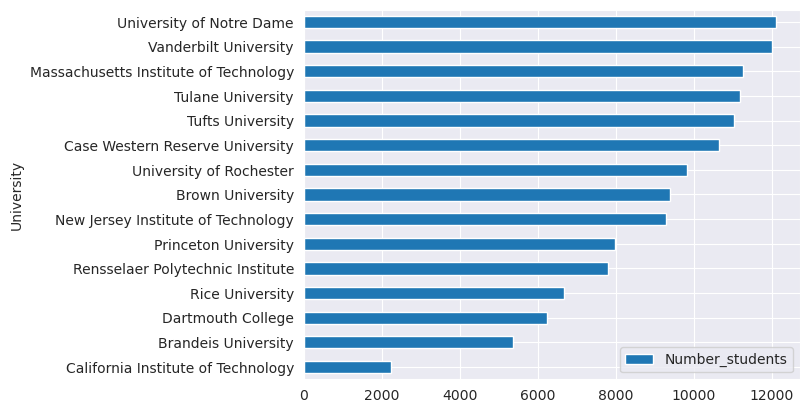

In [18]:
unis.sort_values('Number_students').head(15).plot.barh('University', 'Number_students')

Instead, let's group by state and find the average enrollment in each state.

In [ ]:
# group unis by State and calculate the avg number of students, and then plot the top 10 using barh